In [20]:
import os
import re
import matplotlib.pyplot as plt
from PIL import Image

def display_images_from_text(text) :
    page_patterns = [
        r'(\d+)\s*페이지',
        r'page\s*(\d+)',
        r'페이지\s*(\d+)',
        r'(\d+)\s*page'
    ]
    image_dir = "./data/images/anatomy"

    page_numbers = []
    for pattern in page_patterns :
        matches = re.findall(pattern, text, re.IGNORECASE)
        page_numbers.extend(matches)

    for page_number in page_numbers :
        images = get_images_for_page(image_dir, page_number)

        if images :
            print(f"{page_number}페이지 관련 이미지 :")
            display_images(image_dir, images)
        else :
            print(f"{page_number}페이지 : 관련 이미지 없음")

def get_images_for_page(dir_path, page_number) :
    try :
        files = os.listdir(dir_path)
        return [f for f in files if f.startswith(f"image_{page_number}_") and f.endswith(".png")]
    except FileNotFoundError :
        print(f"폴더를 찾을 수 없습니다. : {dir_path}")
        return []
    
def display_images(dir_path, image_files) :
    for img_file in image_files :
        img_path = os.path.join(dir_path, img_file)
        try :
            img = Image.open(img_path)
            plt.figure(figsize=(10, 8))
            plt.imshow(img)
            plt.title(img_file)
            plt.axis("off")
            plt.show()
        except Exception as e :
            print(f"이미지를 열 수 없습니다 : {img_file} - {e}")

250페이지 관련 이미지 :


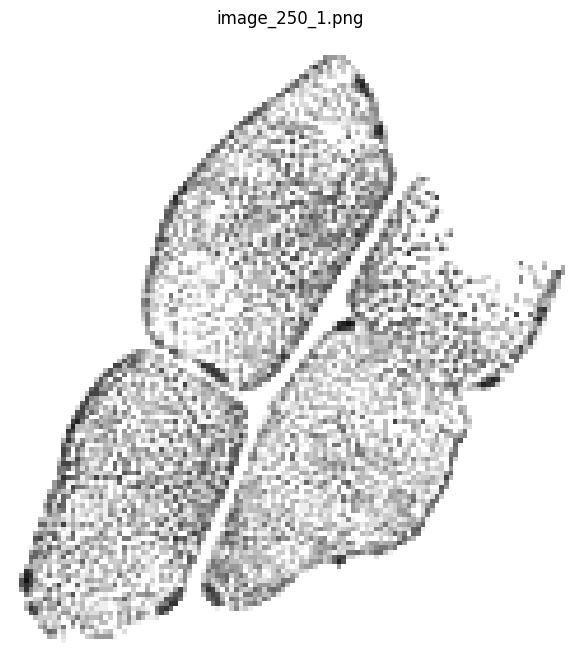

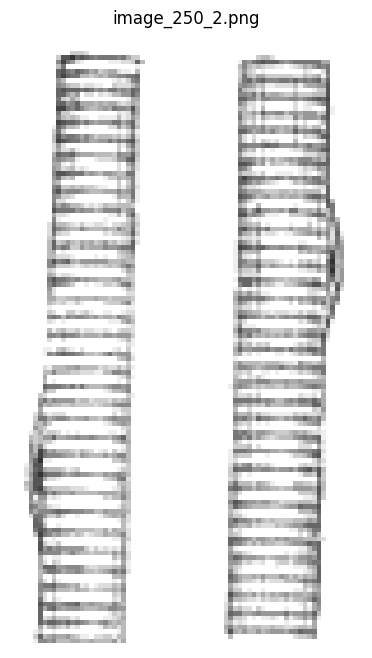

In [27]:
text = "250 페이지"
display_images_from_text(text)